In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np 
import time

//anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# 
# INFO: Your Parameters.
# You can adjust them after completing the lab
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2

#
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

In [3]:
def drawPlots(model, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
  mpl.style.use('ggplot') # Look Pretty

  padding = 3
  resolution = 0.5
  max_2d_score = 0

  y_colors = ['#ff0000', '#00ff00', '#0000ff']
  my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
  colors = [y_colors[i] for i in y_train]
  num_columns = len(X_train.columns)

  fig = plt.figure()
  fig.canvas.set_window_title(wintitle)
  
  cnt = 0
  for col in range(num_columns):
    for row in range(num_columns):
      # Easy out
      if FAST_DRAW and col > row:
        cnt += 1
        continue

      ax = plt.subplot(num_columns, num_columns, cnt + 1)
      plt.xticks(())
      plt.yticks(())

      # Intersection:
      if col == row:
        plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
        cnt += 1
        continue


      # Only select two features to display, then train the model
      X_train_bag = X_train.ix[:, [row,col]]
      X_test_bag = X_test.ix[:, [row,col]]
      model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
      x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
      y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
      xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())

      # Prepare the contour
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
      plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


      score = round(model.score(X_test_bag, y_test) * 100, 3)
      plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
      max_2d_score = score if score > max_2d_score else max_2d_score

      cnt += 1

  print "Max 2D Score: ", max_2d_score
  fig.set_tight_layout(True)

In [37]:
def benchmark(model, wintitle='Figure 1'):
  print '\n\n' + wintitle + ' Results'
  s = time.time()
  for i in range(iterations):
    #
    # TODO: train the classifier on the training data / labels:
    #
    # .. your code here ..
    model.fit(X_train, y_train)
  print "{0} Iterations Training Time: ".format(iterations), time.time() - s


  s = time.time()
  for i in range(iterations):
    #
    # TODO: score the classifier on the testing data / labels:
    #
    # .. your code here ..
    score = model.score(X_test, y_test)
  print "{0} Iterations Scoring Time: ".format(iterations), time.time() - s
  print "High-Dimensionality Score: ", round((score*100), 30)

In [6]:
# 
# TODO: Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
#
# .. your code here ..
X = pd.read_csv('Datasets/Wheat.data')
X.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,104.500000,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,60.765944,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,0.000000,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,52.250000,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000
50%,104.500000,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000
75%,156.750000,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000
max,209.000000,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


In [9]:
# # INFO: An easy way to show which rows have nans in them
#print X[pd.isnull(X).any(axis=1)]
# TODO: Go ahead and drop any row with a nan
#
# .. your code here ..
X = X.dropna()
X.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,104.275862,14.906502,14.588719,0.870930,5.640291,3.264305,3.710425,5.419754
std,60.391157,2.919854,1.309860,0.023336,0.443569,0.378419,1.504453,0.492741
min,0.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,52.500000,12.330000,13.465000,0.857100,5.265000,2.954500,2.570000,5.045500
50%,104.000000,14.380000,14.370000,0.873400,5.541000,3.242000,3.631000,5.228000
75%,155.500000,17.455000,15.805000,0.887050,6.002000,3.564500,4.799000,5.879000
max,209.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [14]:
# 
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

#
# TODO: Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
#
# .. your code here ..
#y = X['wheat_type']
#X = X.drop('wheat_type', 1)

X.describe()
y.describe()

count          203
unique           3
top       canadian
freq            69
Name: wheat_type, dtype: object

In [15]:
X.describe()

,id,area,perimeter,compactness,length,width,asymmetry,groove
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,104.275862,14.906502,14.588719,0.870930,5.640291,3.264305,3.710425,5.419754
std,60.391157,2.919854,1.309860,0.023336,0.443569,0.378419,1.504453,0.492741
min,0.000000,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,52.500000,12.330000,13.465000,0.857100,5.265000,2.954500,2.570000,5.045500
50%,104.000000,14.380000,14.370000,0.873400,5.541000,3.242000,3.631000,5.228000
75%,155.500000,17.455000,15.805000,0.887050,6.002000,3.564500,4.799000,5.879000
max,209.000000,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [16]:
y = y.map({'canadian':0, 'kama':1, 'rosa':2})

In [17]:
y.describe()

count    203.000000
mean       0.995074
std        0.823525
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: wheat_type, dtype: float64

In [33]:
# 
# TODO: Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
#
# .. your code here ..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [34]:
#
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
#
# .. your code here ..
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=C)
#model.fit(X_train, y_train)

In [35]:
#
# TODO: Create an KNeighbors classifier named knn
# Set the neighbor count to 5
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train) 



KNeighbors Results
5000 Iterations Training Time:  2.50145101547
5000 Iterations Scoring Time:  8.0854818821
High-Dimensionality Score:  98.3606557377
Max 2D Score:  98.361


SVC Results
5000 Iterations Training Time:  34.0258989334
5000 Iterations Scoring Time:  2.0247759819
High-Dimensionality Score:  98.3606557377
Max 2D Score:  98.361


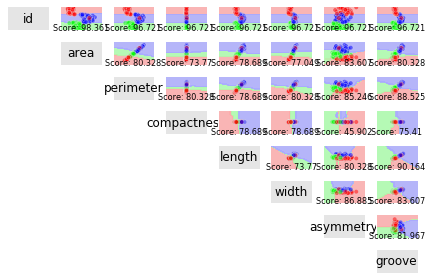

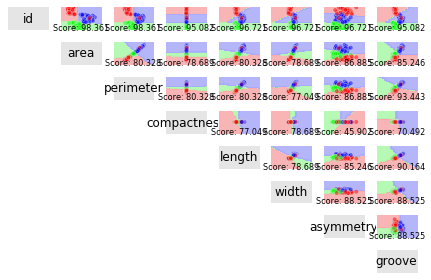

In [38]:
benchmark(knn, 'KNeighbors')
drawPlots(knn, 'KNeighbors')

benchmark(svc, 'SVC')
drawPlots(svc, 'SVC')

plt.show()



#
# BONUS: After submitting your answers, toy around with
# gamma, kernel, and C.